In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import preprocess_input




2023-04-20 14:15:58.143064: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 14:15:58.746362: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import sys
print(sys.executable)

/home/tk/Documents/AI_Final_Project/plant_env/bin/python


# Defining our dataset

In [3]:

ds, info = tfds.load(
    'plant_village', 
    split='train', # the dataset only has a train split
    shuffle_files=True,
    with_info=True, 
    as_supervised=True)


assert isinstance(ds, tf.data.Dataset)
print("----------------------ASSERT----------------------\n")
print(ds)



#print("----------------------INFO----------------------\n")
#print(info)

class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

#print(class_names)
#print(n_classes)

----------------------ASSERT----------------------

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


2023-04-20 14:16:01.734843: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-20 14:16:01.819033: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-20 14:16:01.819238: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Benchmarking our Dataset

In [4]:
#ds = ds.batch(32).prefetch(1)
#tfds.benchmark(ds, batch_size=32)
#tfds.benchmark(ds, batch_size=32)


# Visualizing our Dataset

2023-04-20 14:16:02.844087: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8]
	 [[{{node Placeholder/_0}}]]
2023-04-20 14:16:02.844720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8]
	 [[{{node Placeholder/_0}}]]


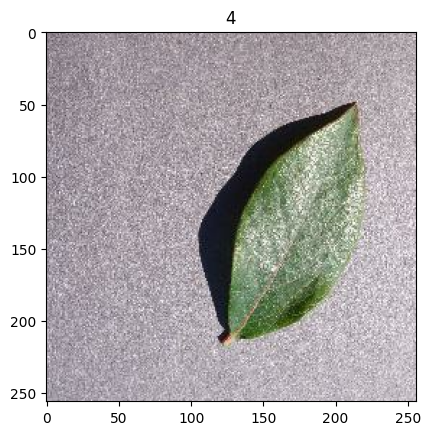

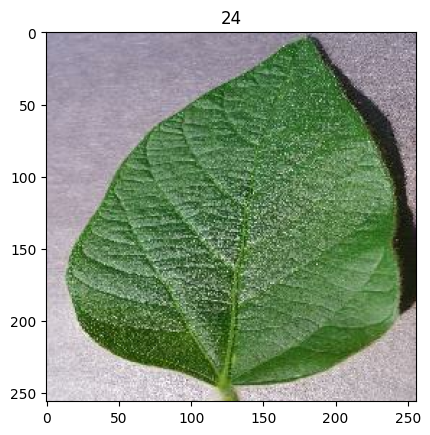

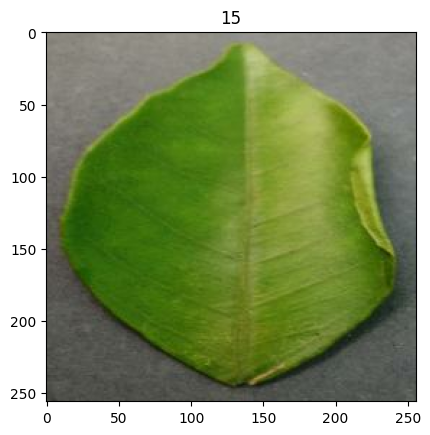

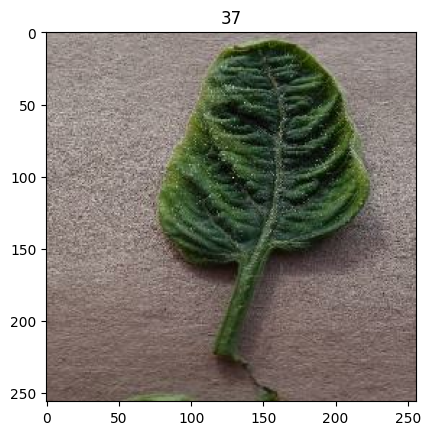

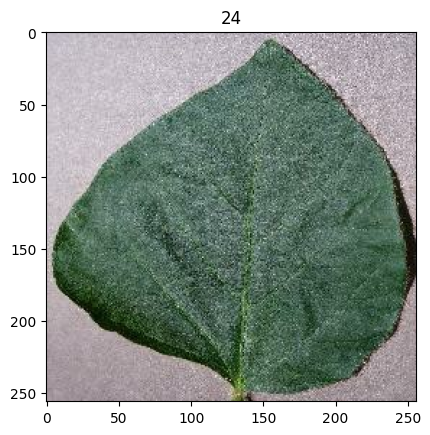

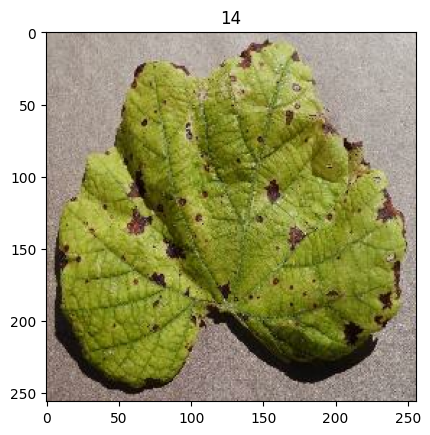

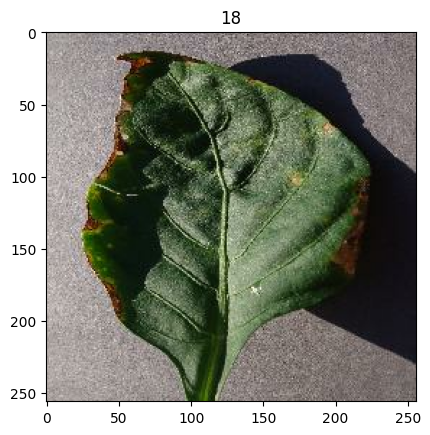

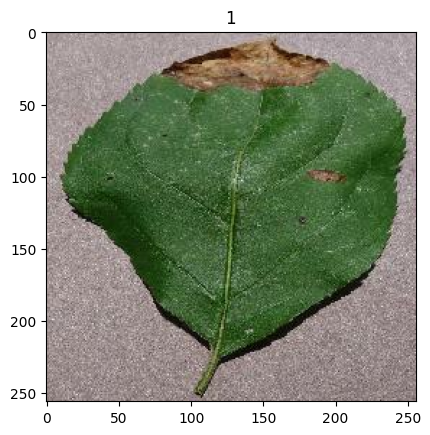

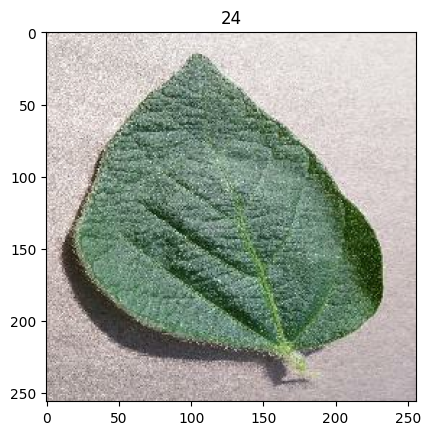

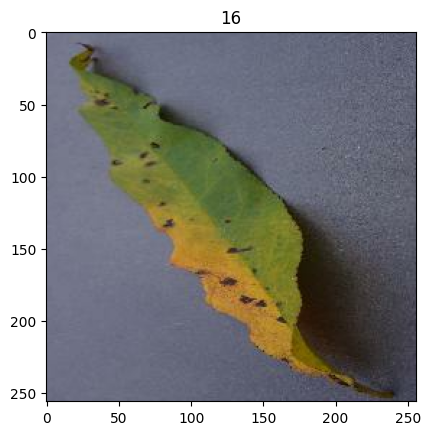

In [5]:


for image, label in ds.take(10):
    plt.imshow(image.numpy())
    plt.title(label.numpy())
    plt.show()

# Preprocessing

2023-04-20 14:16:04.619579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8]
	 [[{{node Placeholder/_0}}]]
2023-04-20 14:16:04.619915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8]
	 [[{{node Placeholder/_0}}]]


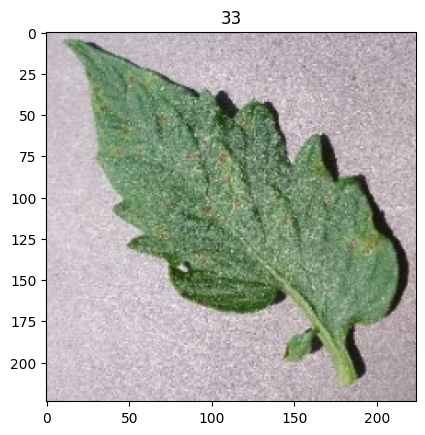

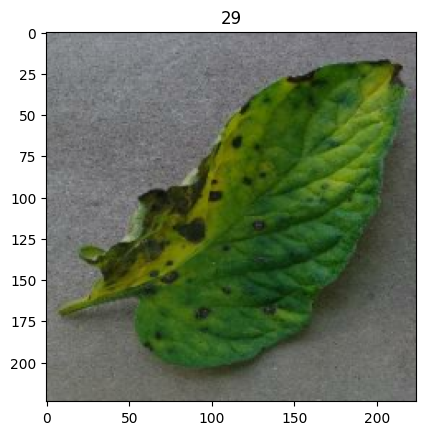

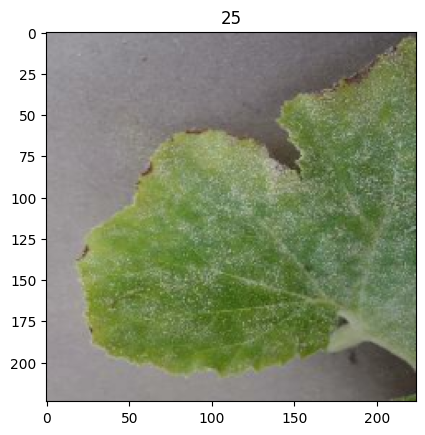

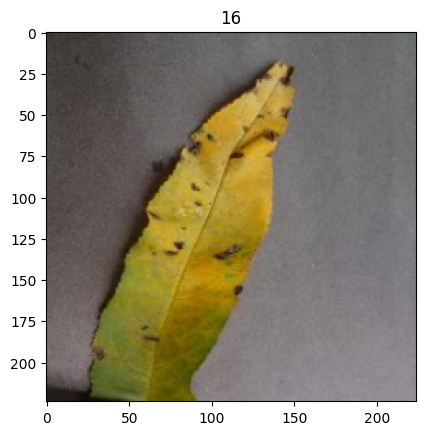

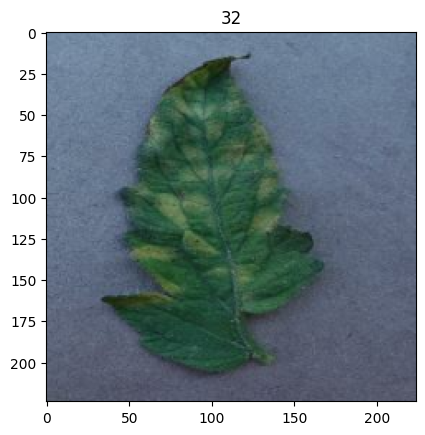

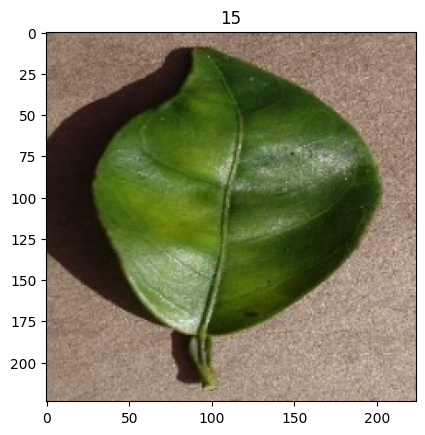

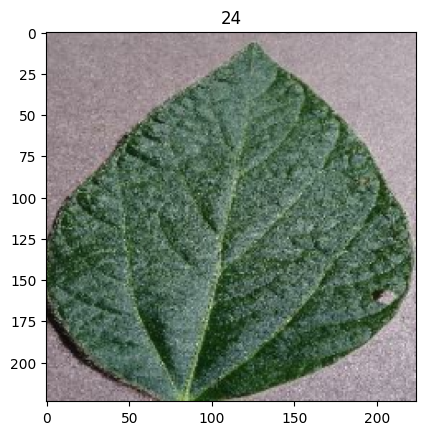

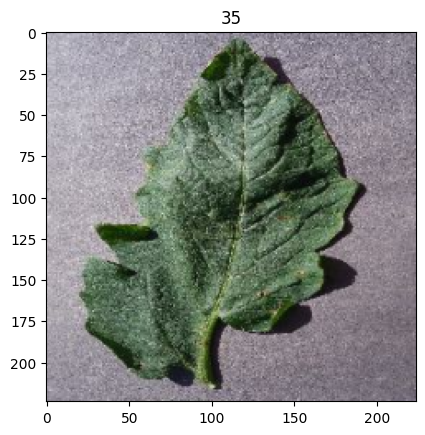

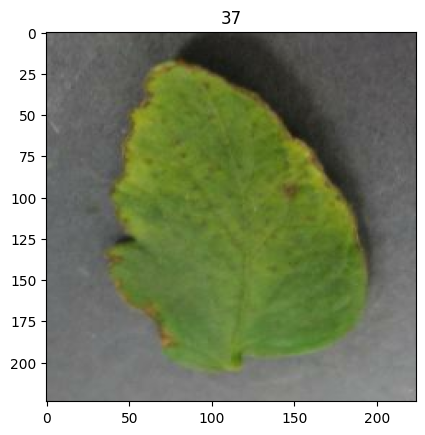

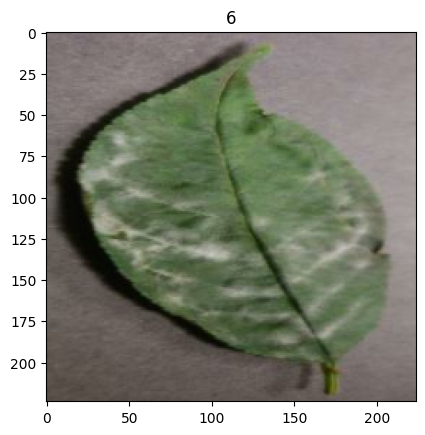

0.0
0.78699464


In [6]:
IMG_SIZE = 224

# Define a function to preprocess the images
def preprocess_image(image, label):
    # Convert the image to float32
    image = tf.cast(image, tf.float32)
    # Normalize the pixel values
    image = image / 255.0
    # Resize the image to the target size
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    # Return the preprocessed image and label
    return image, label

ds = ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
assert isinstance(ds, tf.data.Dataset)

for image, label in ds.take(10):
    plt.imshow(image.numpy())
    plt.title(label.numpy())
    plt.show()
    
# print the minimum and maximum pixel values
print(np.min(image))
print(np.max(image))

## splitting the dataset into train and testing

In [7]:
# Get the total number of examples in the dataset
num_examples = info.splits['train'].num_examples
print("This is the number of images or examples we have in our dataset: ", num_examples)

This is the number of images or examples we have in our dataset:  54303


In [8]:
# Define the sizes of the training and testing sets
train_size = int(0.8 * num_examples)
print("Train size: ", train_size)

test_size = num_examples - train_size
print("Test size: ", test_size)

Train size:  43442
Test size:  10861


In [9]:
# Split the dataset into training and testing sets
ds_train = ds.take(train_size)
ds_test = ds.skip(train_size)

In [10]:
assert isinstance(ds_train, tf.data.Dataset)
print("----------------------ASSERT TRAIN----------------------\n")
print(ds_train)

assert isinstance(ds_test, tf.data.Dataset)
print("----------------------ASSERT TEST----------------------\n")
print(ds_test)



----------------------ASSERT TRAIN----------------------

<_TakeDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
----------------------ASSERT TEST----------------------

<_SkipDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [11]:
#print("Number of examples in training set: ", len(list(ds_train)))
#print("Number of examples in testing set: ", len(list(ds_test)))

In [ ]:
tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
